## Question 9: Third Party Data

Authors: dtradke, CCV

Date: April 25, 2021

This notebook is authored for the intention of answering question 13 for the Compound Analytics Questions posted by Flipside Crypto, found at the following link (https://www.notion.so/Analytics-Bounties-for-Compound-62013e59c5d04b4281d0868efdcfaab0). The substance of the question involves finding relationships between third party data activity and the Compound cryptocurrency (COMP). In this study, we decide to focus on the relationship between Twitter data and the price of COMP, specifically aiming to address the following three questions:

1. How does the number of tweets containing '\\$COMP' affect the price?

2. How does the sentiment of the tweets containing '\\$COMP' affect the price?

3. How does the "reach", or total number of followers from accounts tweeting about '\\$COMP' affect the price?

First, we load the Python libraries used for the data analysis.

In [18]:
import re, tweepy, datetime, time, csv
from tweepy import OAuthHandler
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request as rq
import numpy as np
import json
import os

Below, we import the backend code which contains all of the data processing and graphing code which we will use for our analysis.

In [19]:
# Import backend code
import util

We now create a Twitter client object to load the tweets we want, and process them accorning to our analysis.

In [20]:
# make Twitter client object
api = util.TwitterClient()

Now we will load the price data for COMP. The Twitter API is currently having trouble loading more than the previous 3 days of data, so we are forced to limit our study to the previous 3 days from the time of authorship.

In [21]:
# Load the price of COMP. The Twitter API is having trouble loading tweets longer than 3 days ago,
# so we only load the previous 3 days of price data
path = 'data/COMP_prices.json'
url = 'https://api.flipsidecrypto.com/api/v2/queries/b032afe7-ac48-487a-96c2-5a35b738154e/data/latest'
day_dict = util.loadData(url, path)

We now load the actual tweets into a Pandas dataframe. We have previously saved the tweets in a CSV file because you need a special developer account and access keys to load the tweets on your own in an online fashion. This way, we are still able to analyze the tweets in an offline manner.

In [22]:
# Load the previous 3 days of tweets containing the string '$COMP'. You need a Twitter developer account to do this,
# so we pre-saved the tweets corresponding to the time of the price data
path = 'data/COMP_tweets40000.csv'
tweets_df = util.loadTextTweets(api, path, count=40000, txt_to_query='$COMP')

### Experiment 1: Total Tweets

In the first experiment, we are interested in finding how the number of total tweets containing the string '\\$COMP' affects the price of the entity. This experiment revolves around understanding how the total volume of "chatter" on social media about the entity encourages the price to move a certain way.

The graph below shows the total number of tweets containing the string '\\$COMP' (bars) and the price of COMP over time (line). The x-axis on this plot is time. We notice a positive correlation among the number of tweets made throughout a day and the increase in price, seen with the highest number of tweets being on April 23rd and the price of COMP increasing over 33% in under 24 hours. The days with less tweets, the 22nd and 24th, saw either less increase in price or a decrease in price.

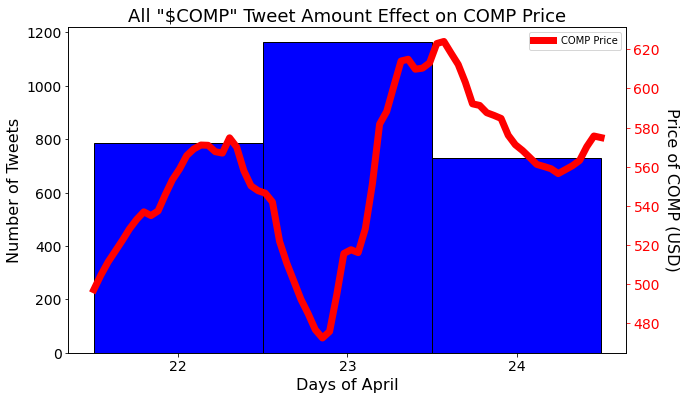

In [23]:
# Match up the price data and tweets, graph the absolute amount of tweets each day
day_dict, tweet_amt, tweet_sentiment, tweet_reach = util.matchTweetsPrices(day_dict, tweets_df)
util.plotTweetAmts(day_dict, tweet_amt, username='All "$COMP"')

### Experiment 2: Sentiment of Tweets

In the second experiment, we are interested in finding how the mean sentiment of the tweets containing the string '\\$COMP' affects the price of the entity. This experiment revolves around understanding how the tone, or mindset, of the population on social media about the entity encourages the price to move a certain way. Sentiment analysis is a natural language processing (NLP) technique to determine how "positive" or "negative" the tone of a string of text is. Specifically in our setting, positive tweets receive a score of 1, and negative tweets receive a -1. Neutral tweets receive a score of 0.

In our analysis, we remove the neutral tweets from the dataset and calculate the mean sentiment for each day. Our results below show that the averate tweet sentiment remains relatively stable despite the vast change in price. Alhtough slight, the sentiment does drop about 6\% when COMP's price drops about 18\% between April 22nd and April 23rd, while the sentiment and price both increase the following day. We conclude that the sentiment of tweets has more of a "posterior" correlation as more of a reactionary effect instead of driving the price itself.

/Users/dtradke/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/dtradke/.pyenv/versions/3.8.6/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


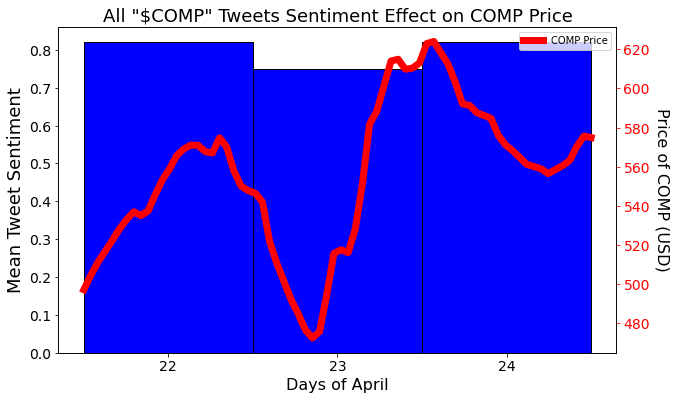

In [24]:
# Match up the price data and tweets, graph the mean sentiment of tweets each day
day_dict, tweet_amt, tweet_sentiment, tweet_reach = util.matchTweetsPrices(day_dict, tweets_df, get_sentiment=True)
util.plotTweetAmts(day_dict, tweet_sentiment, username='All "$COMP"', sentiment=True)

### Experiment 3: Affect of Tweet Reach

In the third experiment, we are interested in finding how the "reach", or amount of followers a tweet reaches, of tweets containing the string '\\$COMP' affects the price of the entity. This experiment revolves around understanding the volume of the social media graph neighborhood that the "chatter" about COMP reaches, specifically the total number of people receiving the tweets on their timelines.

Our results below show that the price increases over 30\% as the reach of the tweet increases by about 1.5M followers. This is the highest fluctuation in our analysis, and has a positive correlation with the number of people who are seeing tweets about \\$COMP on their timelines. Although the Twitter API limits the time of our analysis, it would be interesting to see if this trend continues with more data

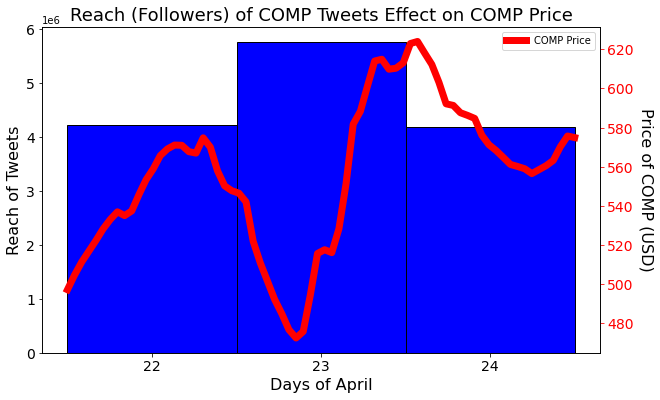

In [25]:
# plot the "reach", or how many followers of accounts who tweeted each day
util.plotTweetAmts(day_dict, tweet_reach, username='All "$COMP"', reach=True)

## Conclusion

We have shown how total tweet volume, tweet sentiment, and tweet reach correlates with the price of Compound. Our results show that there are positive correlations between the total number of tweets containing the string '\\$COMP', the reach, or number of people those tweets reach, and the price of Compound. Specifically, when twitter is more active and reaching more people when discussing the entity, the price tends to increase dramatically. On the other hand, our sentiment analysis has shown how the "positive" or "negative" tones of the tweets about '\\$COMP' affect the price. We find that this has a delayed, or reactionary, correlation with the price, as more negative tweets are usually made following a dip in the price. Although more data will be needed to show general trends, it is interesting to note that our results could mean that large Twitter influencers with millions of followers could impact the price of Compound. These people could influence the price by initiating a discussion or sharing information about the entity with their followers, increasing the total volume of tweets and the overall reach, which we have shown have a positive correlation with price.